# **Problem Statement**

##Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

##Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

##Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied

# **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/EasyVisa.csv')
#returns first 5 rows
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
df1=df.copy()

# **Data Overview**

###1. Structure of Data

In [ ]:
df.shape

(25480, 12)

###2. Type of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


###3. Missing values treatment

In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


###4. Data Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
df['unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


###5. Statistical Summary

In [ ]:
df[['no_of_employees','prevailing_wage']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


In [ ]:
df.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
#Converting negative values in number of employees column

In [ ]:
df['no_of_employees']=abs(df['no_of_employees'])

In [ ]:
# case_id consists of uniques ID for cases and hence will not add value to the modeling
df.drop(["case_id"], axis=1, inplace=True)

In [ ]:
#categorical variables into binary numeric variables

##Insights

* The dataset contains 25,480 cases with a wide range of employee numbers and prevailing wages, indicating significant variability.
* Data quality issues were identified, including negative employee counts.
* Most cases are from Asia (66.2%) and involve employees with a Bachelor's degree (40.2%).
* A significant majority of positions are full-time (89.4%), and prevailing wages are reported in various units (e.g., yearly, hourly), with annual wages being the most common (90.1%).
* Certified cases make up 66.8% of the dataset, with categorical variables converted to binary numeric values for further analysis.
* The code snippet effectively converts categorical variables into binary numeric variables, which is often necessary for machine learning models or statistical analysis.

# **Exploratory Data Analysis**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}')

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    ax.set_title(f'Distribution of {feature}')
    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} vs {target}')
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Distribution and Boxplots of {predictor} with respect to {target}', fontsize=16)


    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis

#### Observations on continent

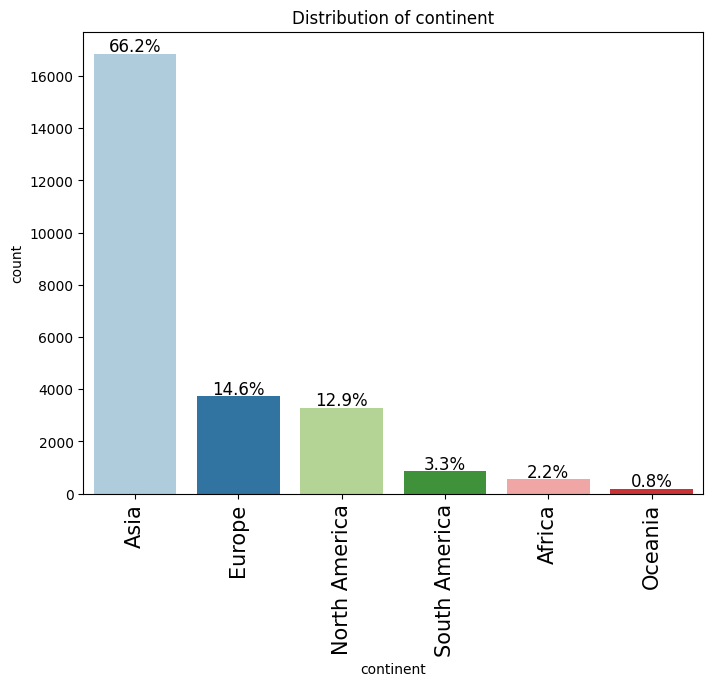

In [ ]:
labeled_barplot(df, "continent", perc=True)

#### Observations on education_of_employee

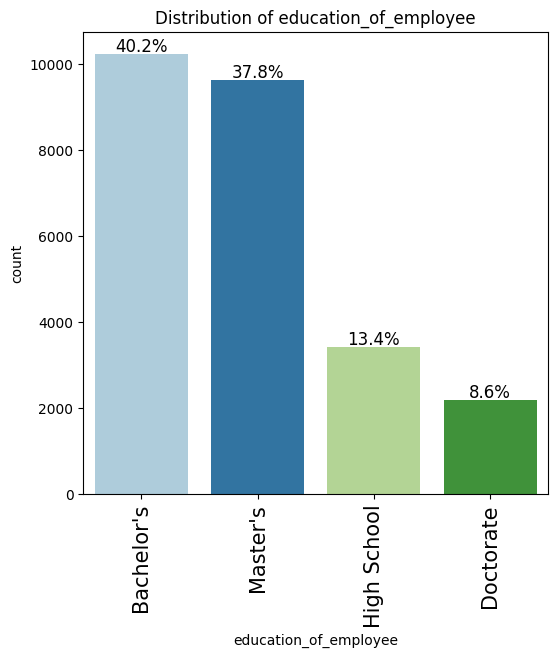

In [ ]:
labeled_barplot(df, "education_of_employee", perc=True)

#### Observations on has_job_experience

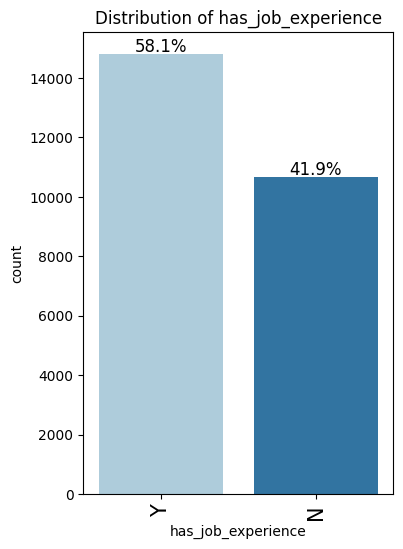

In [ ]:
labeled_barplot(df, "has_job_experience", perc=True)

#### Observations on requires_job_training

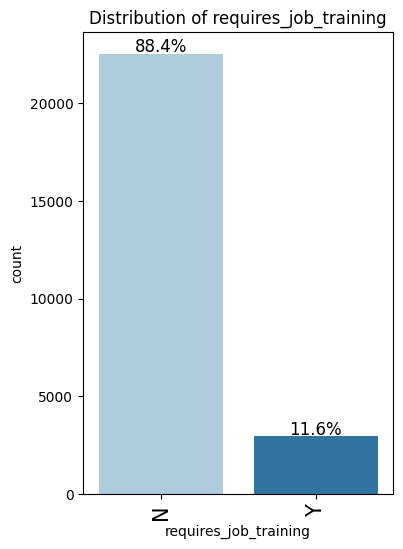

In [ ]:
labeled_barplot(df, "requires_job_training", perc=True)

#### Observations on no_of_employees

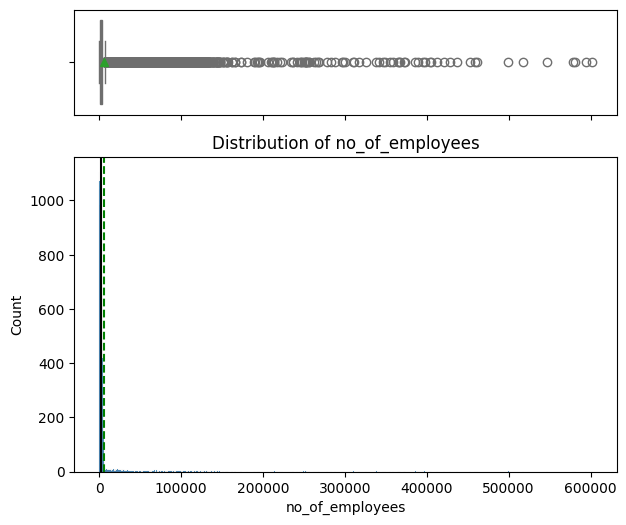

In [ ]:
histogram_boxplot(df, "no_of_employees",figsize=(7,6))

#### Observations on yr_of_estab

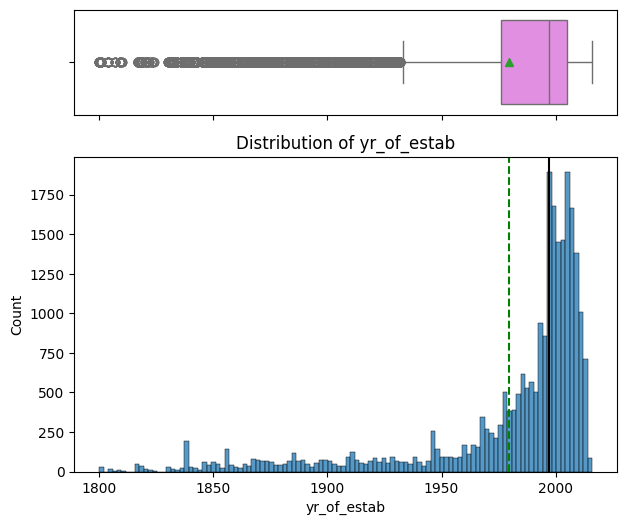

In [ ]:
histogram_boxplot(df, "yr_of_estab",figsize=(7,6))

#### Observations on region_of_employment

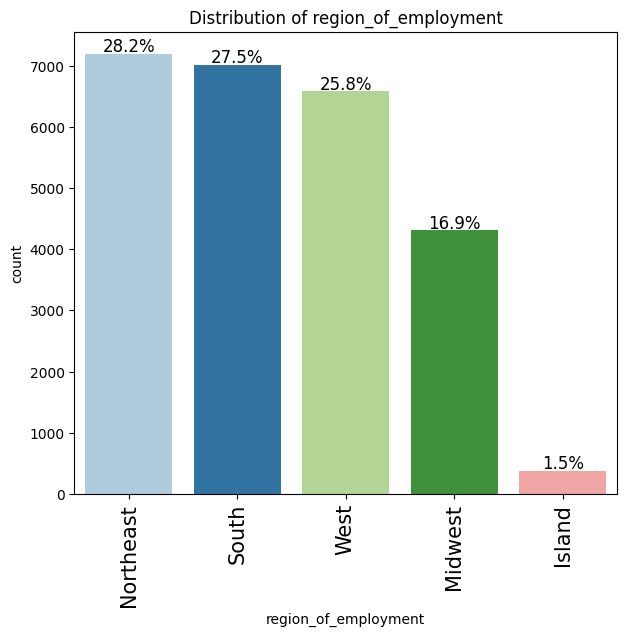

In [ ]:
labeled_barplot(df, "region_of_employment", perc=True)

#### Observations on prevailing_wage

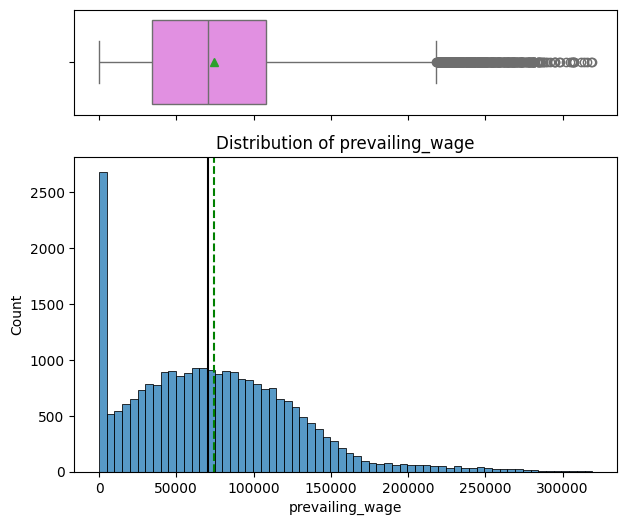

In [ ]:
histogram_boxplot(df, "prevailing_wage",figsize=(7,6))

#### Observations on unit_of_wage

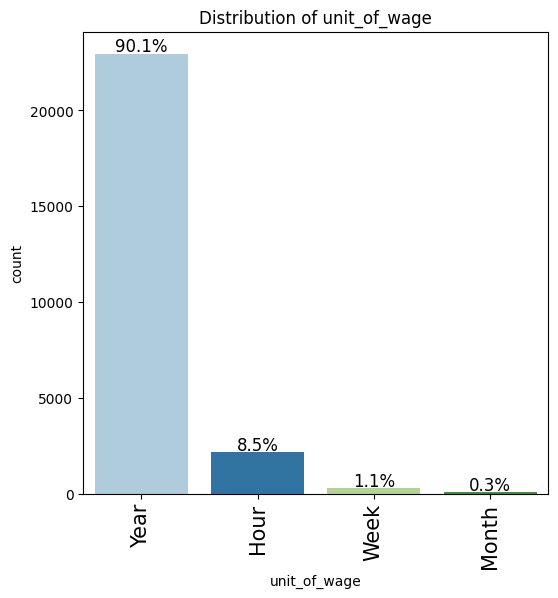

In [ ]:
labeled_barplot(df, "unit_of_wage", perc=True)

#### Observations on full_time_position

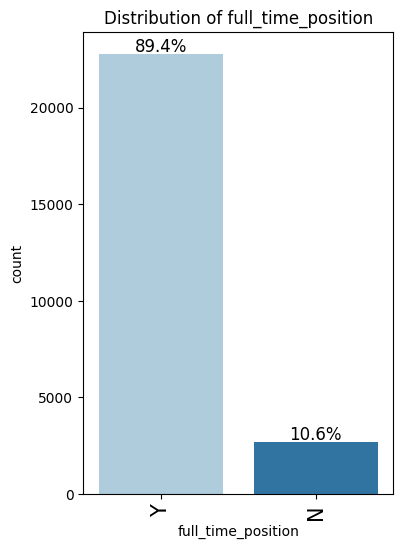

In [ ]:
labeled_barplot(df, "full_time_position", perc=True)

#### Observations on case_status

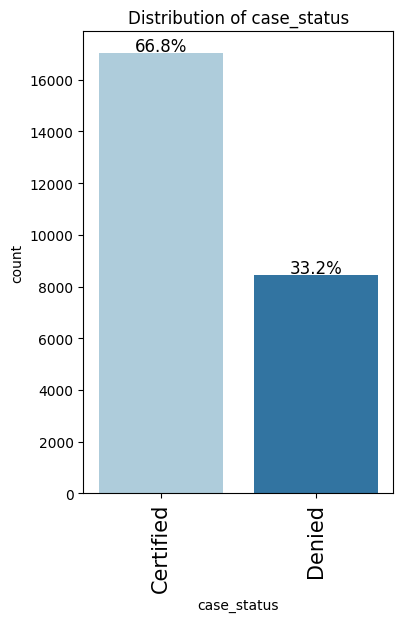

In [ ]:
labeled_barplot(df, "case_status", perc=True)

####Insights



*  Number of employees distribution suggests that most companies have a relatively small number of employees, but there are a few large companies that significantly impact the overall distribution
* The histogram shows a significant peak in the number of companies established between 1950 and 2000. This suggests that a large portion of the dataset represents relatively newer companies.
* The majority of cases (66.2%) originate from Asia, and the most common educational background among employees is a Bachelor's degree (40.2%).
* Most positions are full-time (89.4%), and reported wages vary by unit (e.g., annual, hourly), with annual wages being the predominant measure (90.1%).
* Approximately two-thirds (66.8%) of the cases are certified, and categorical variables have been converted to binary numeric values for subsequent analysis


###Bivariate Analysis

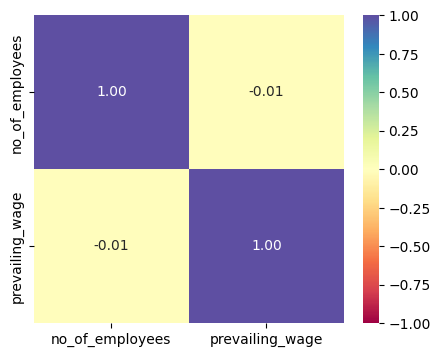

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("yr_of_estab")
plt.figure(figsize=(5, 4))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Insights

* Positive correlation between job experience and case status indicates that having job experience is strongly positively correlated with a certified case status.
* Positions requiring job training are more likely to be full-time positions.
* the number of employees and prevailing wage do not seem to be strong predictors of the other variables.

In [ ]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

####Wage vs Job Experience

####Hourly Wage

In [ ]:
df_h=df[(df["unit_of_wage"] == "Hour")]

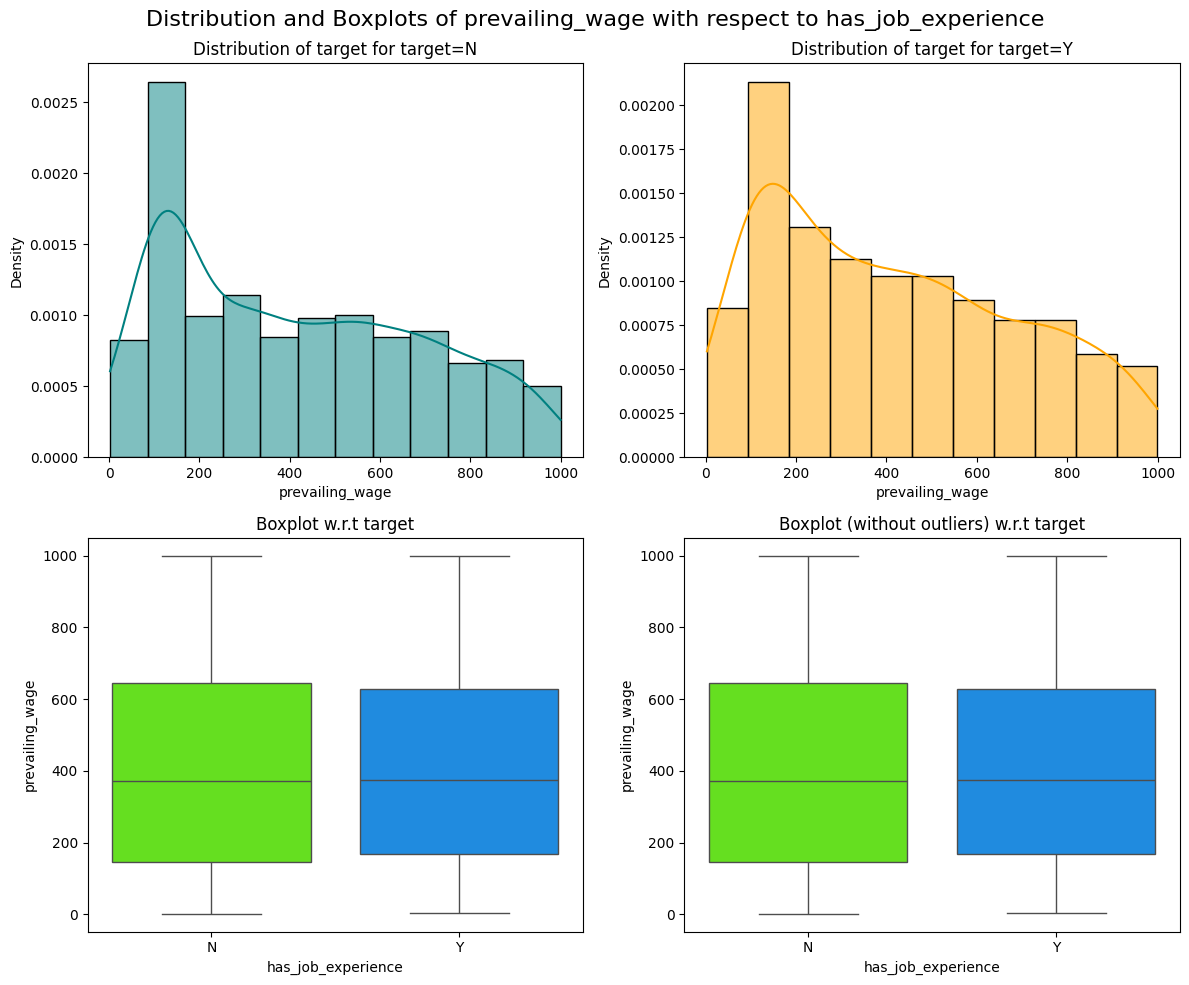

In [ ]:
distribution_plot_wrt_target(df_h, "prevailing_wage","has_job_experience")

####Weekly Wage

In [ ]:
df_w=df[(df["unit_of_wage"] == "Week")]

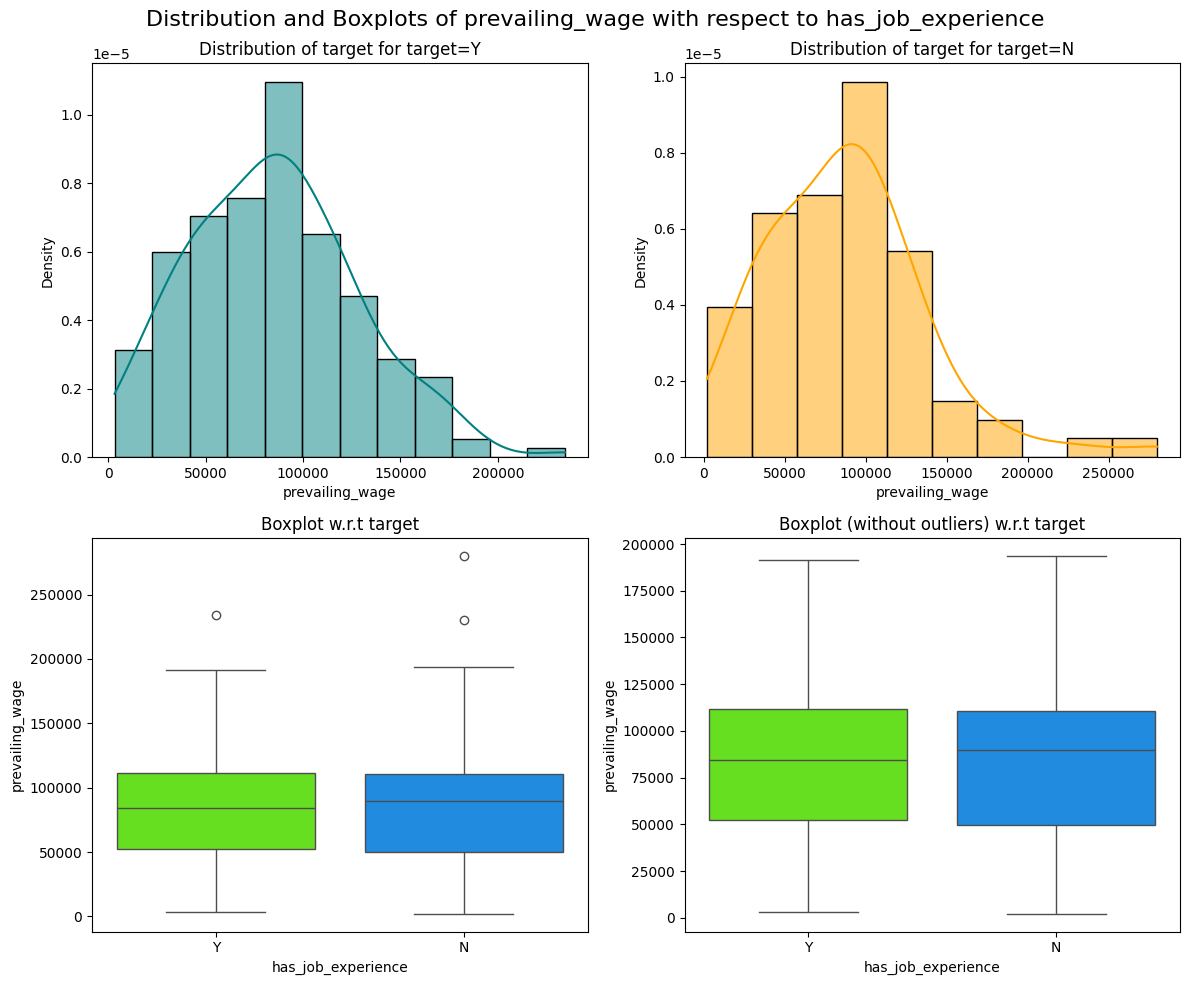

In [ ]:
distribution_plot_wrt_target(df_w, "prevailing_wage","has_job_experience")

####Monthly Wage

In [ ]:
df_m=df[(df["unit_of_wage"] == "Month")]

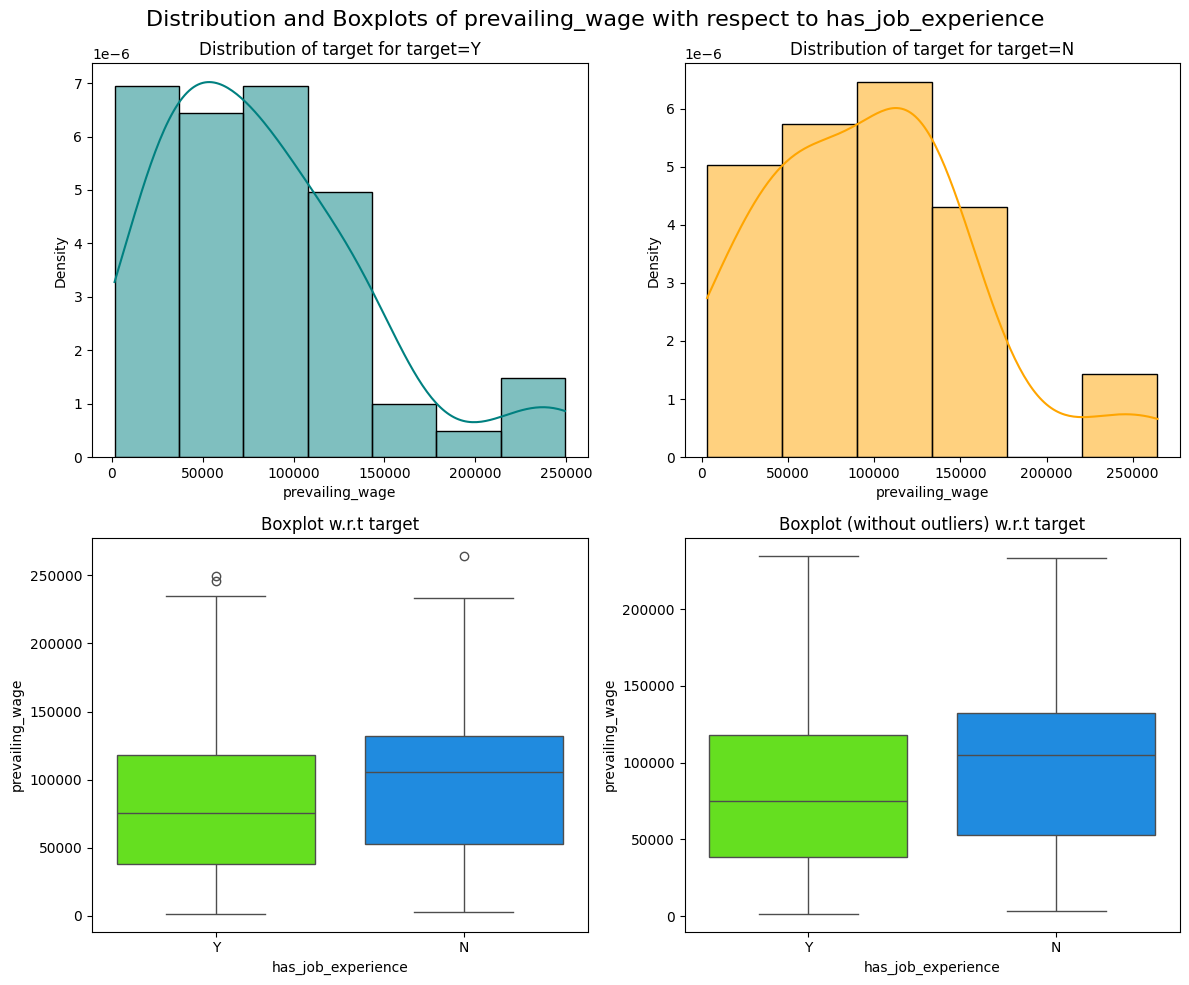

In [ ]:
distribution_plot_wrt_target(df_m, "prevailing_wage","has_job_experience")

####Yearly Wage

In [ ]:
df_y=df[(df["unit_of_wage"] == "Year")]

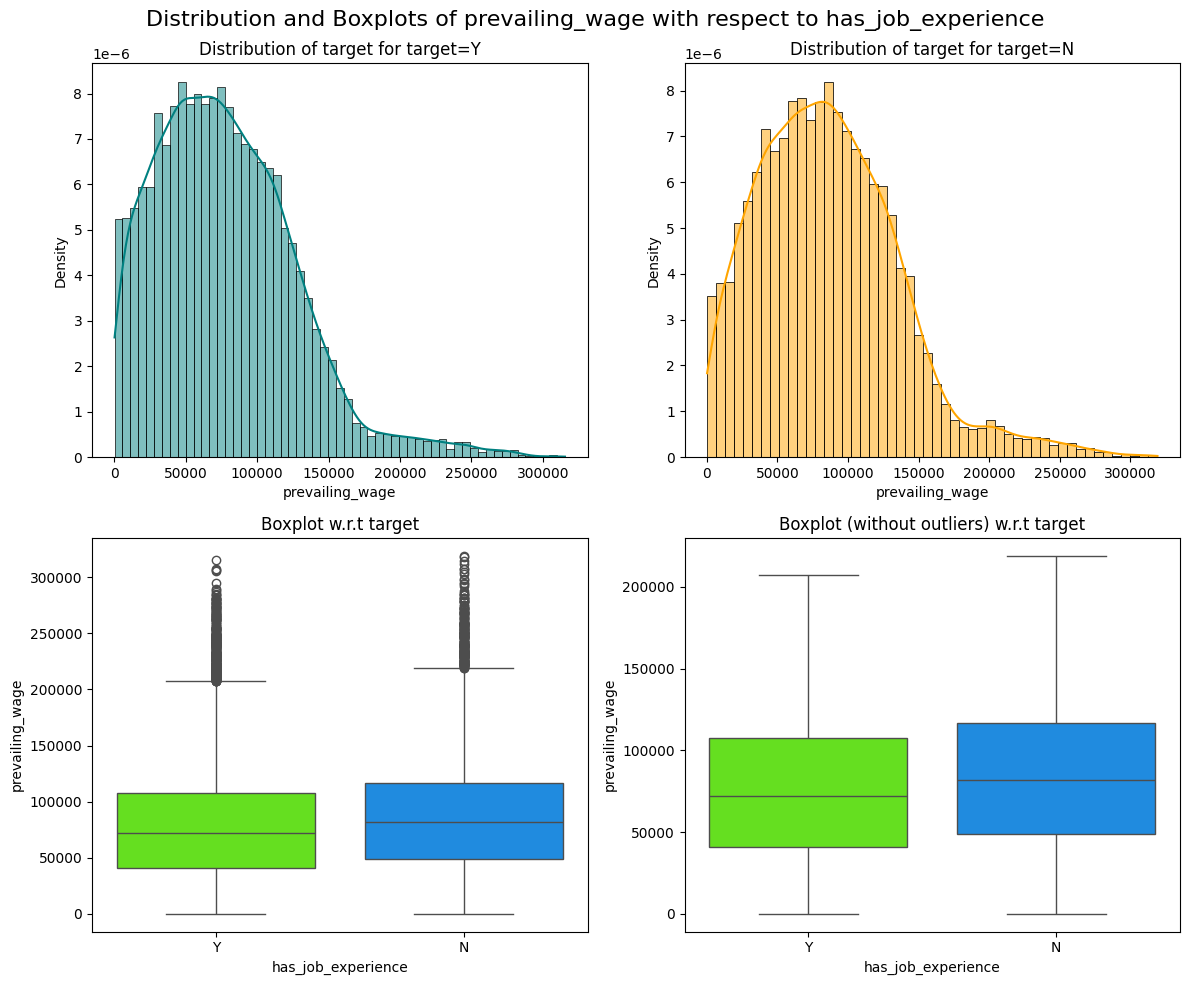

In [ ]:
distribution_plot_wrt_target(df_y, "prevailing_wage","has_job_experience")

In [87]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

####Wage vs Job Training

####Hourly Wage

In [ ]:
df_h=df[(df["unit_of_wage"] == "Hour")]

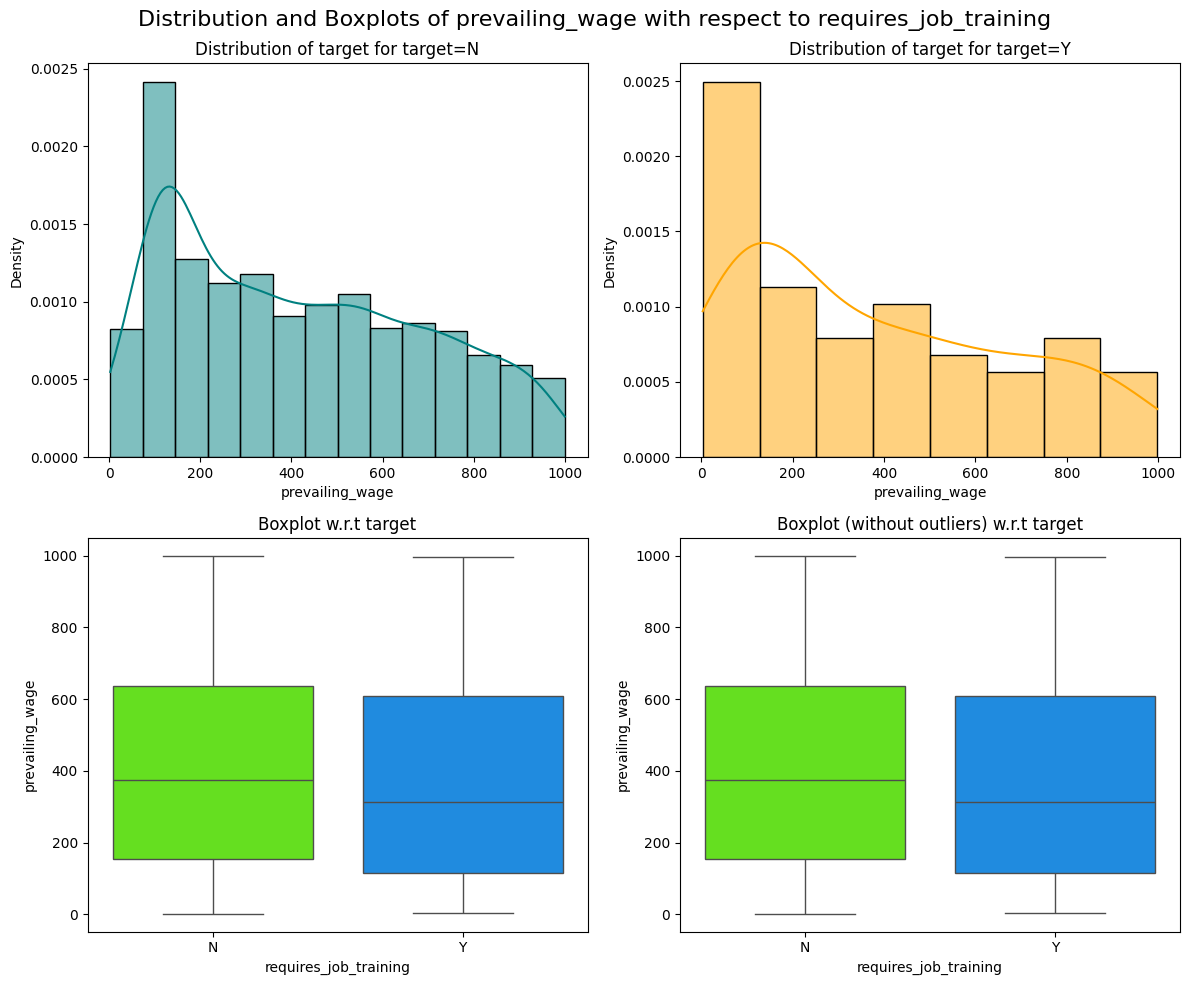

In [ ]:
distribution_plot_wrt_target(df_h, "prevailing_wage","requires_job_training")

####Weekly Wage

In [ ]:
df_w=df[(df["unit_of_wage"] == "Week")]

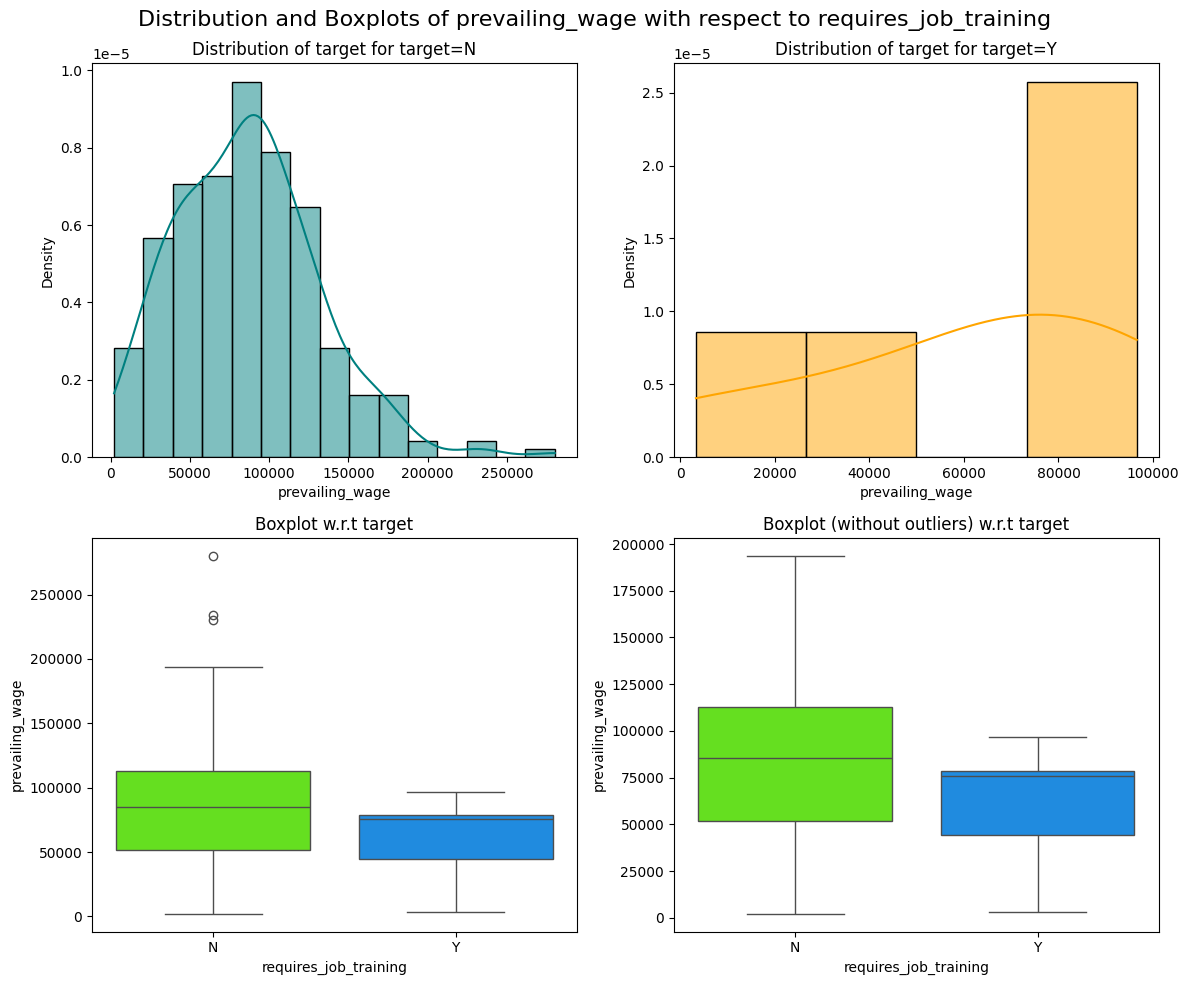

In [ ]:
distribution_plot_wrt_target(df_w, "prevailing_wage","requires_job_training")

####Monthly Wage

In [ ]:
df_m=df[(df["unit_of_wage"] == "Month")]

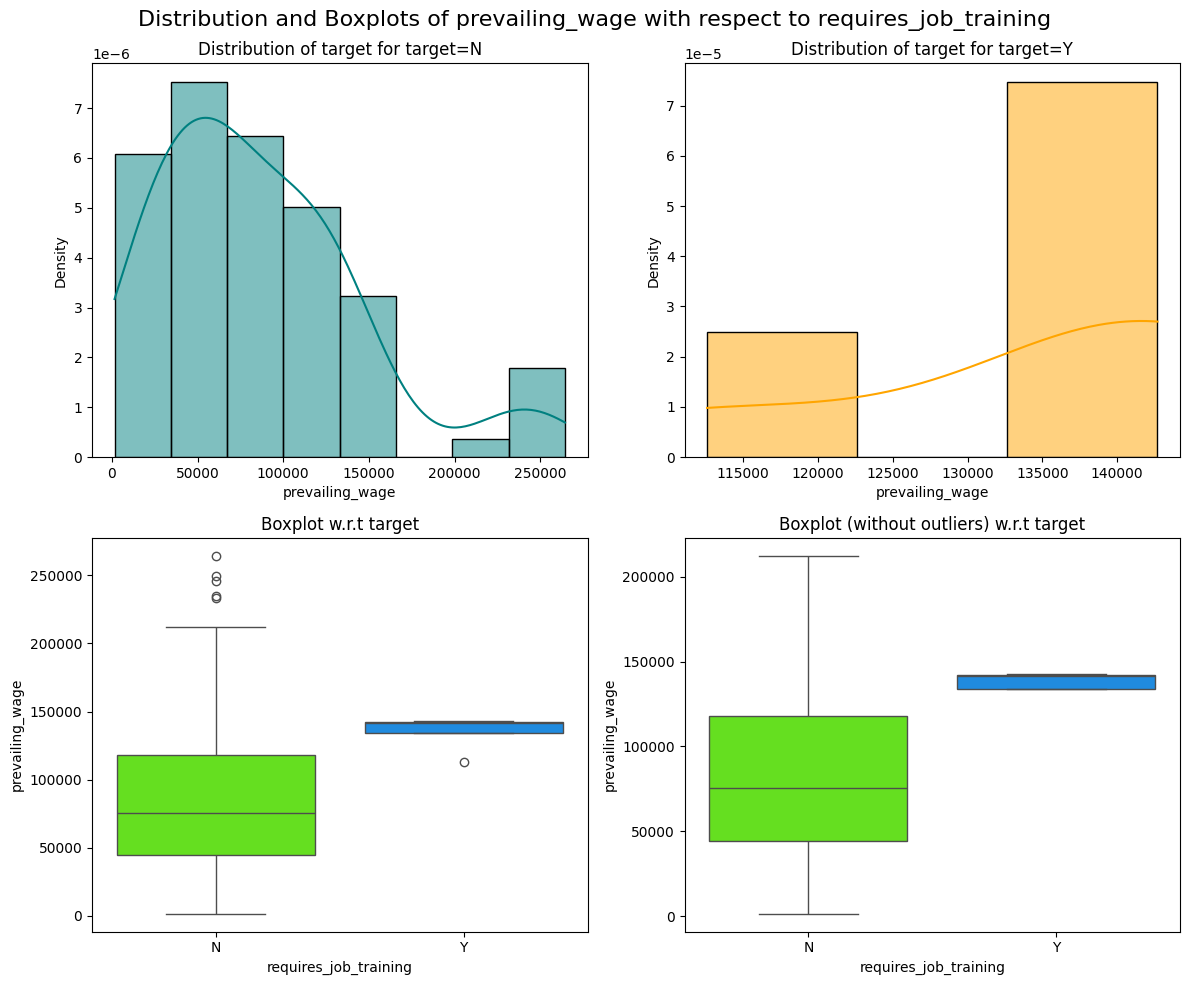

In [ ]:
distribution_plot_wrt_target(df_m, "prevailing_wage","requires_job_training")

####Yearly Wage

In [ ]:
df_y=df[(df["unit_of_wage"] == "Year")]

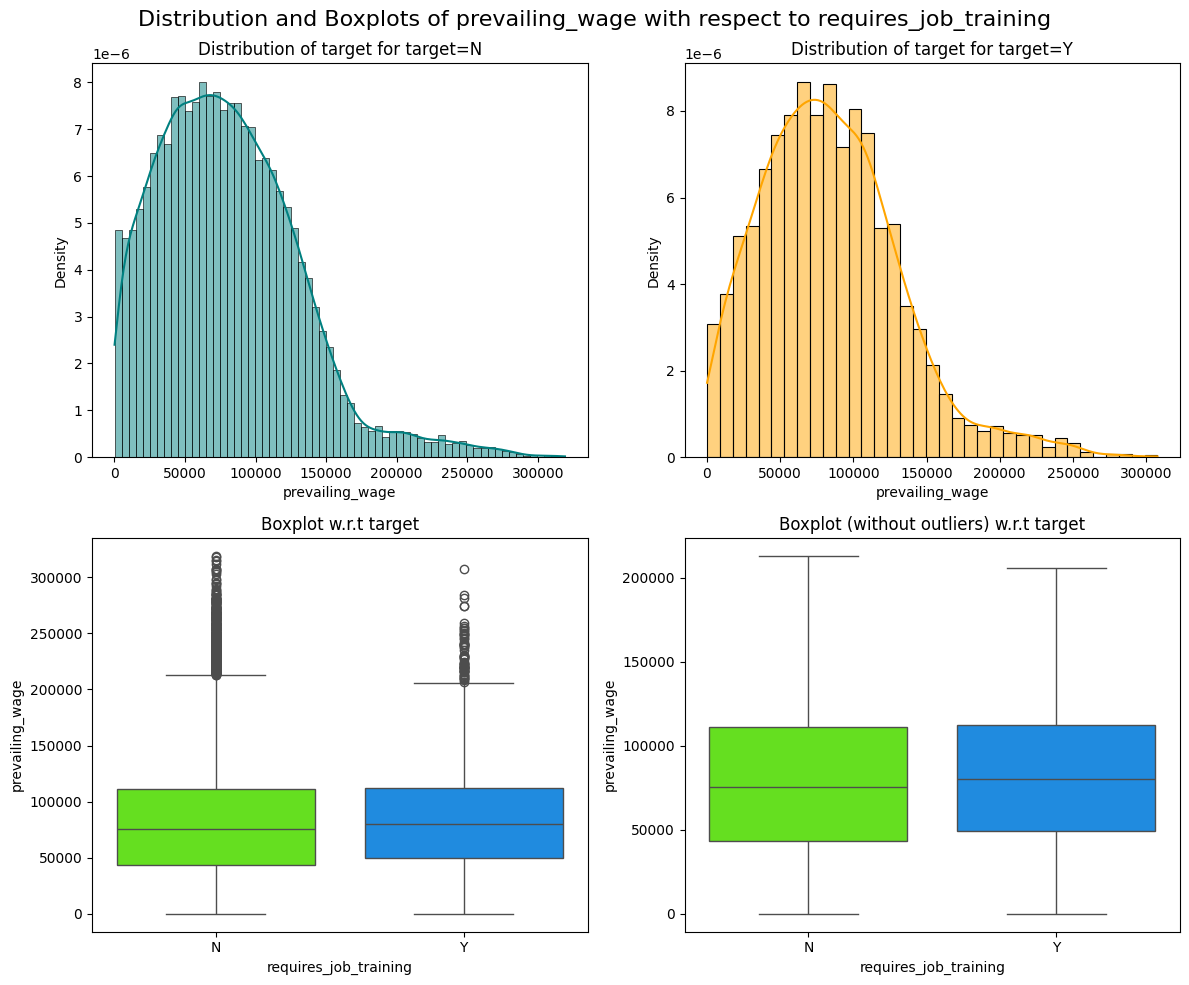

In [ ]:
distribution_plot_wrt_target(df_y, "prevailing_wage","requires_job_training")

####Wage vs full_time_position

####Hourly Wage

In [ ]:
df_h=df[(df["unit_of_wage"] == "Hour")]

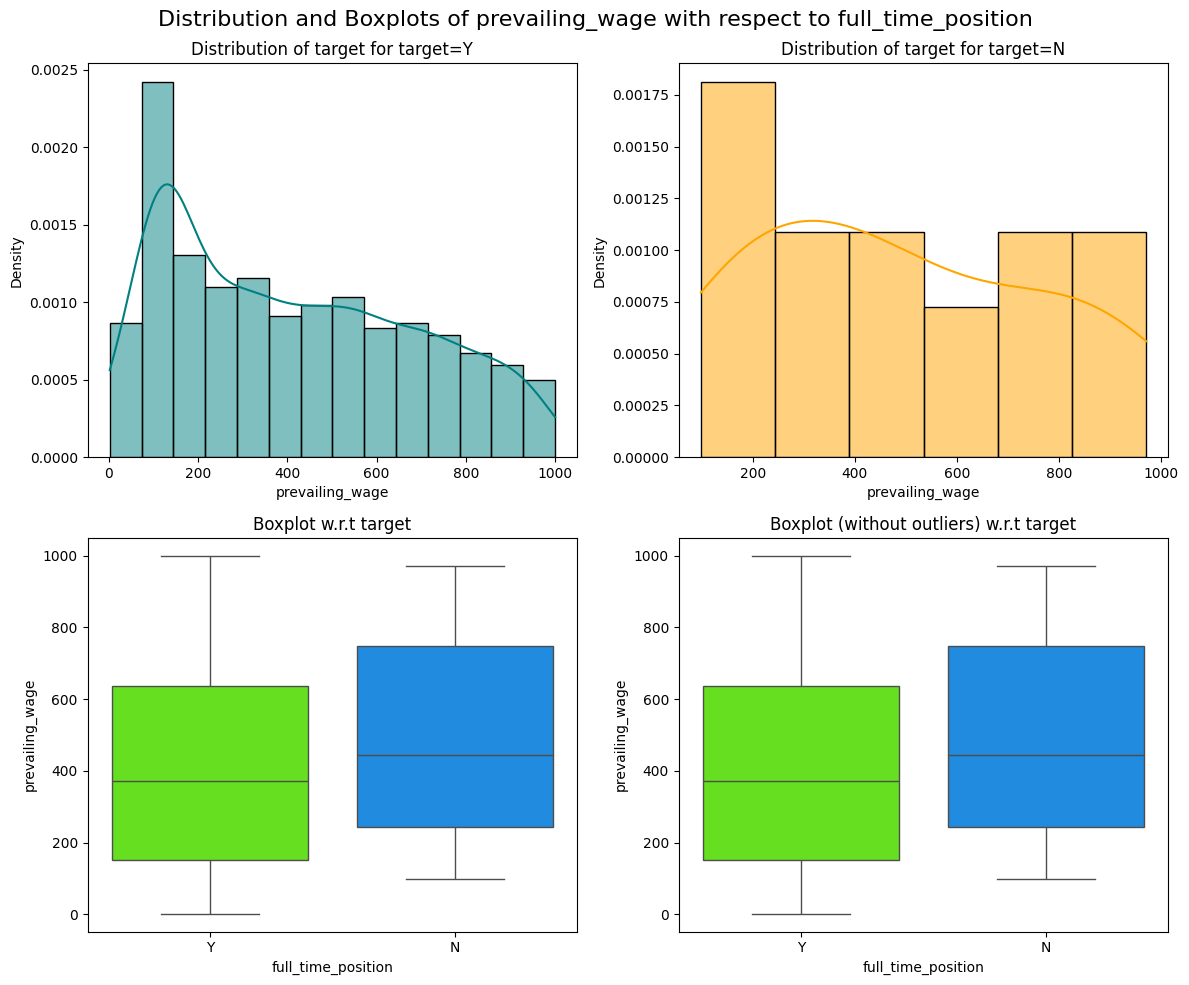

In [ ]:
distribution_plot_wrt_target(df_h, "prevailing_wage","full_time_position")

####Weekly Wage

In [ ]:
df_w=df[(df["unit_of_wage"] == "Week")]

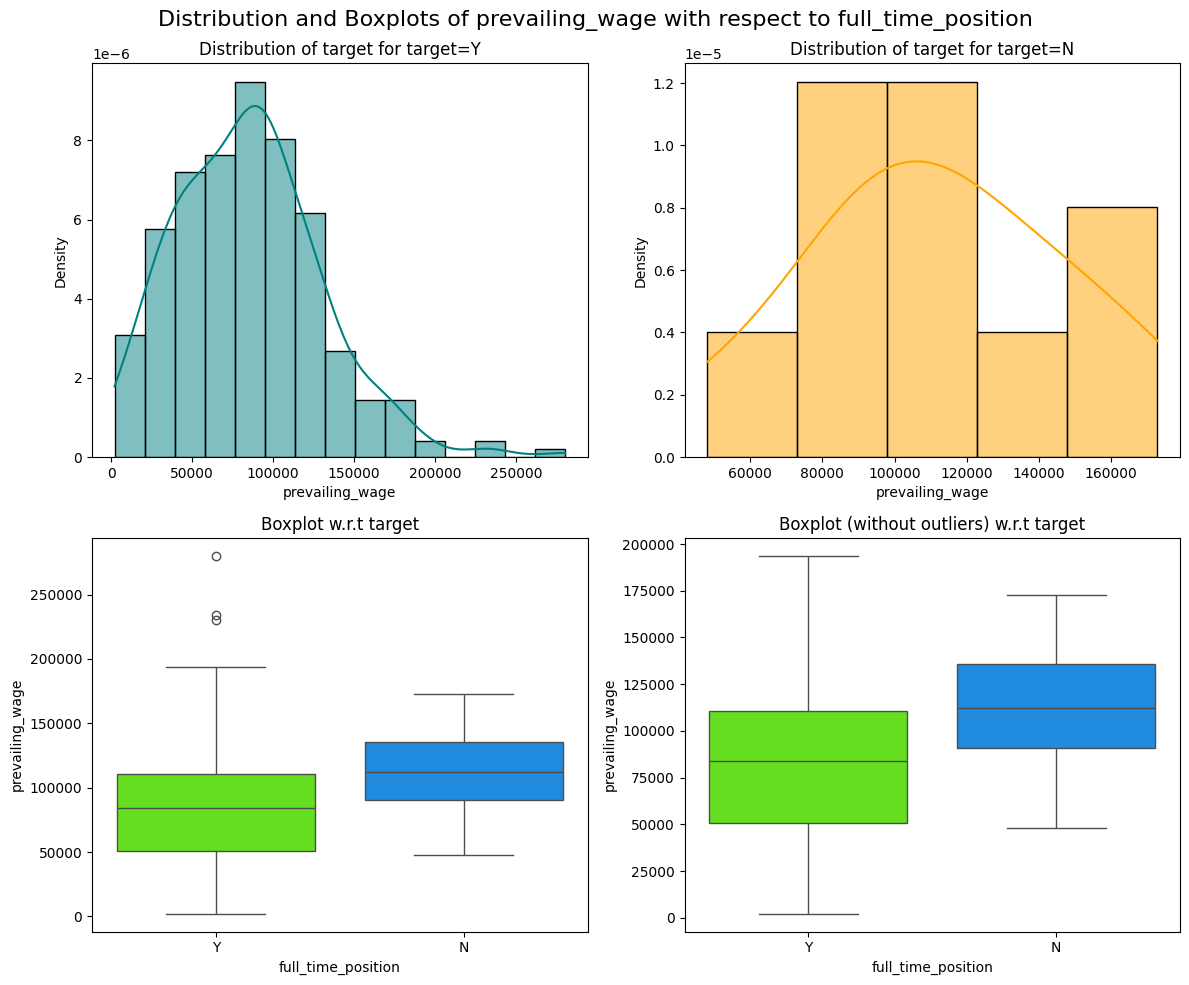

In [ ]:
distribution_plot_wrt_target(df_w, "prevailing_wage","full_time_position")

####Monthly Wage

In [ ]:
df_m=df[(df["unit_of_wage"] == "Month")]

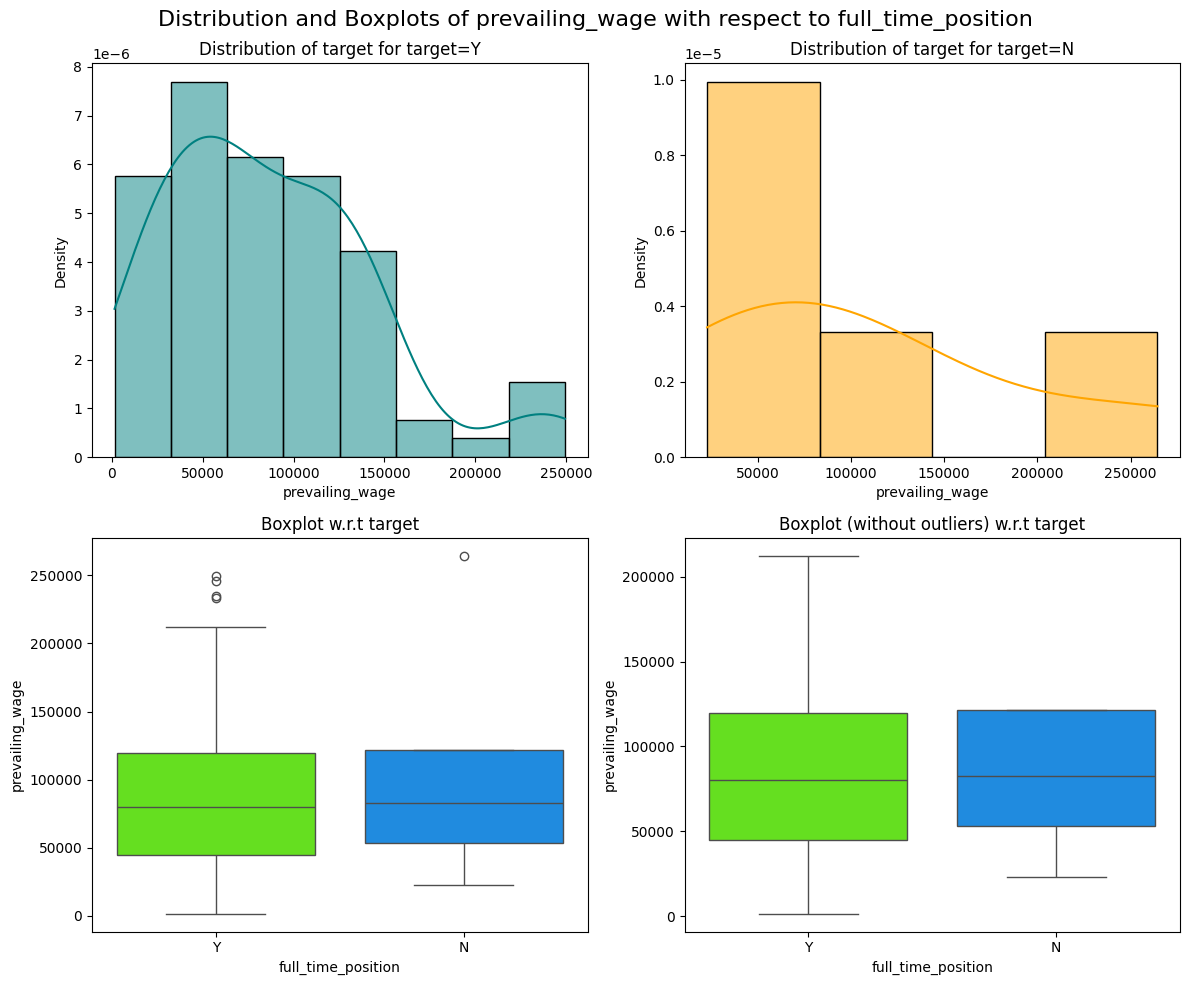

In [ ]:
distribution_plot_wrt_target(df_m, "prevailing_wage","full_time_position")

####Yearly Wage

In [ ]:
df_y=df[(df["unit_of_wage"] == "Year")]

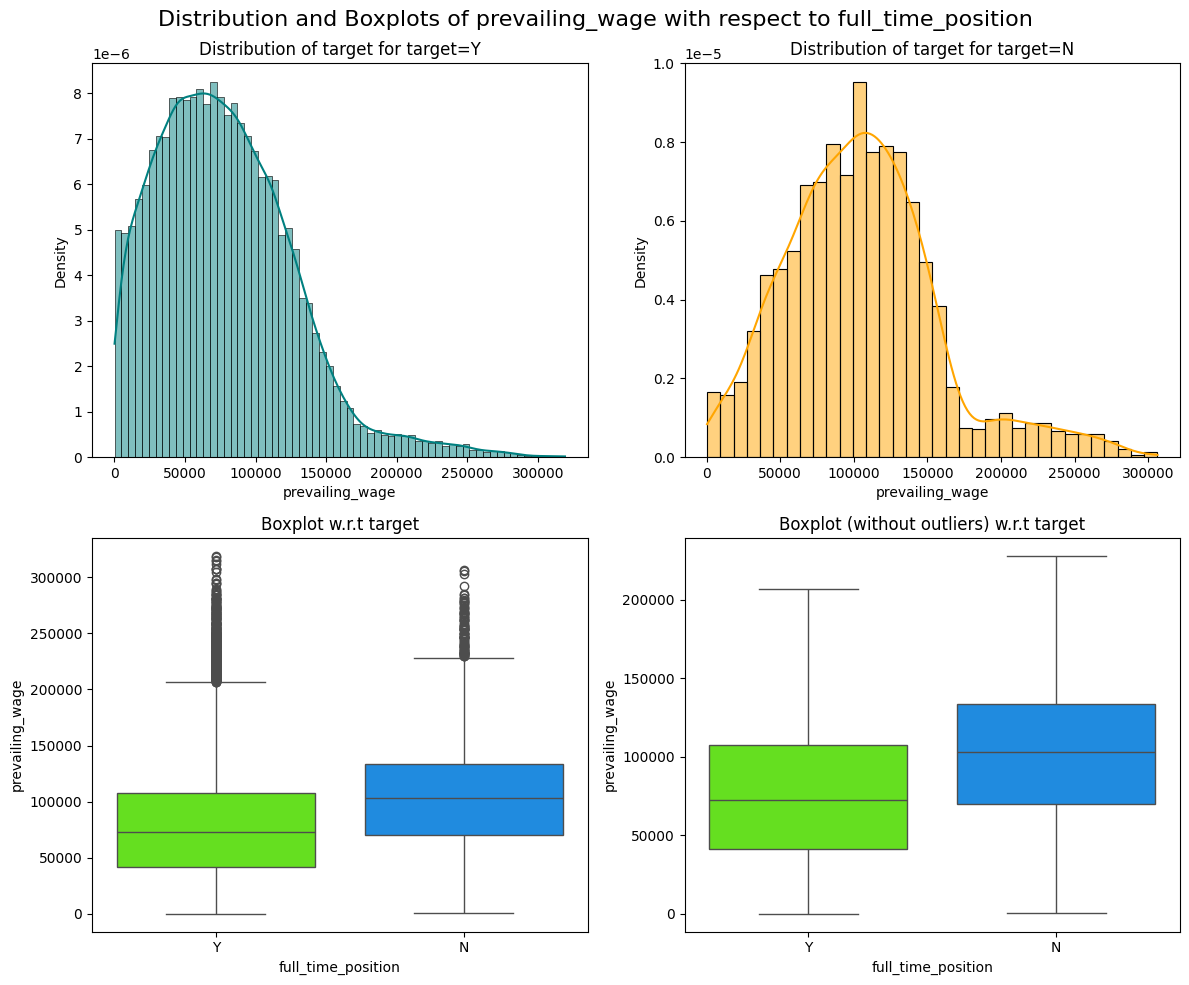

In [ ]:
distribution_plot_wrt_target(df_y, "prevailing_wage","full_time_position")

#### Case Status vs Job Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


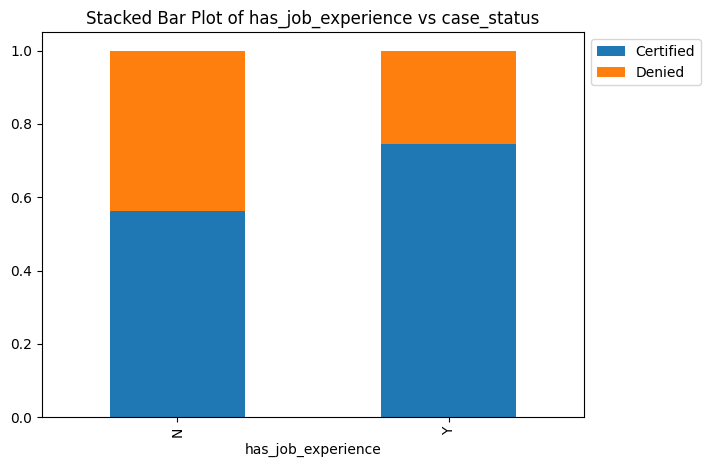

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

#### Case Status vs Job training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


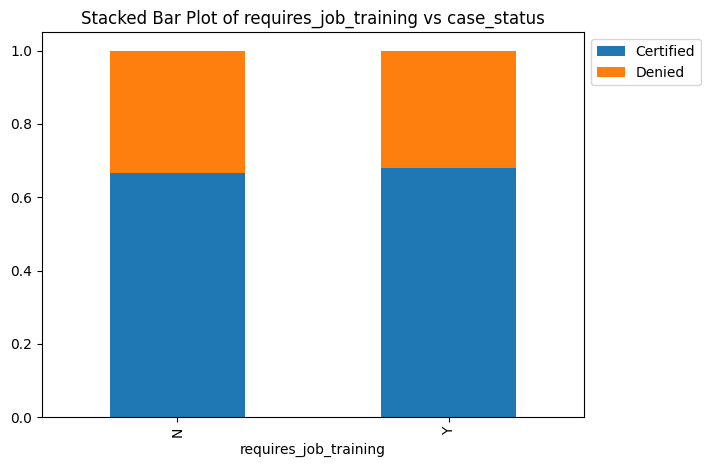

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

#### Case Status vs Full Time Position

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


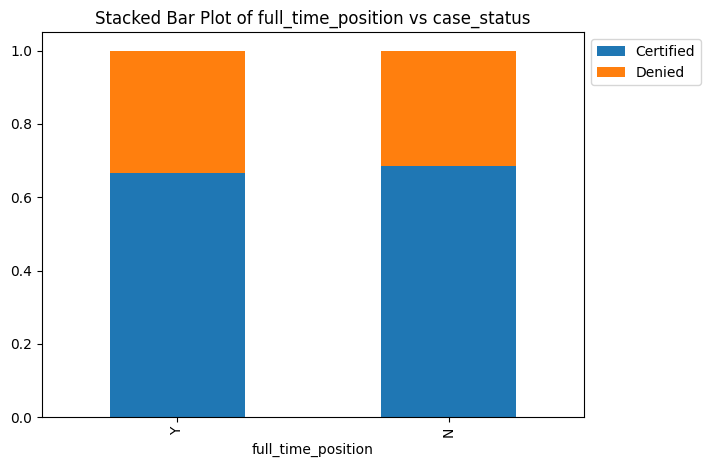

In [ ]:
stacked_barplot(df, "full_time_position", "case_status")

#### Case Status vs Region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


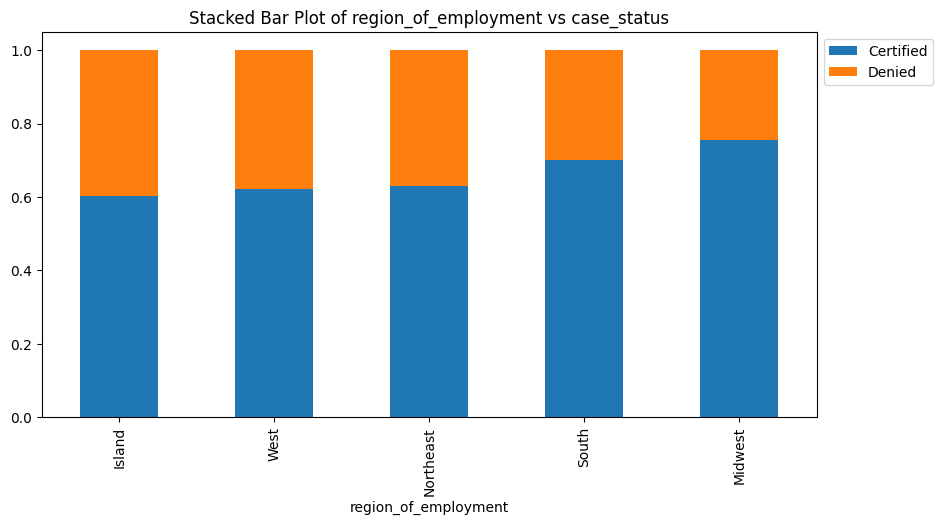

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

#### Case Status vs Education

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


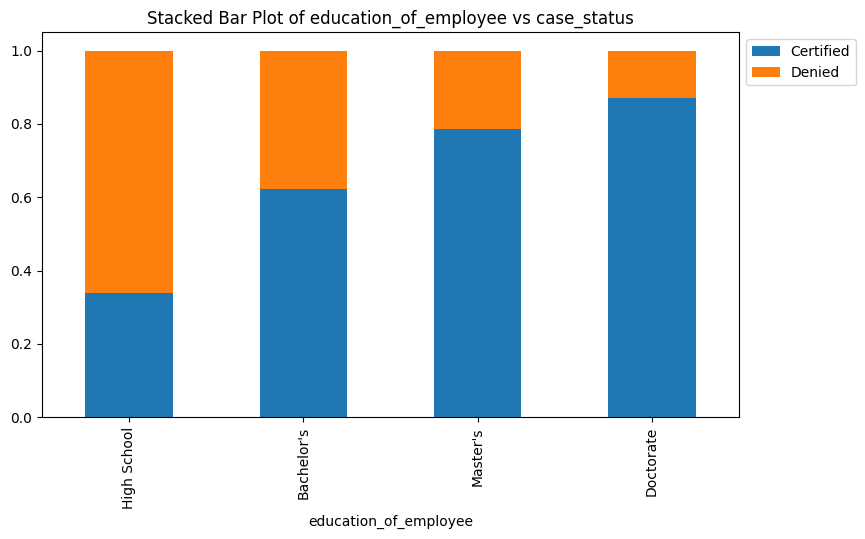

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

#### Case Status vs Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


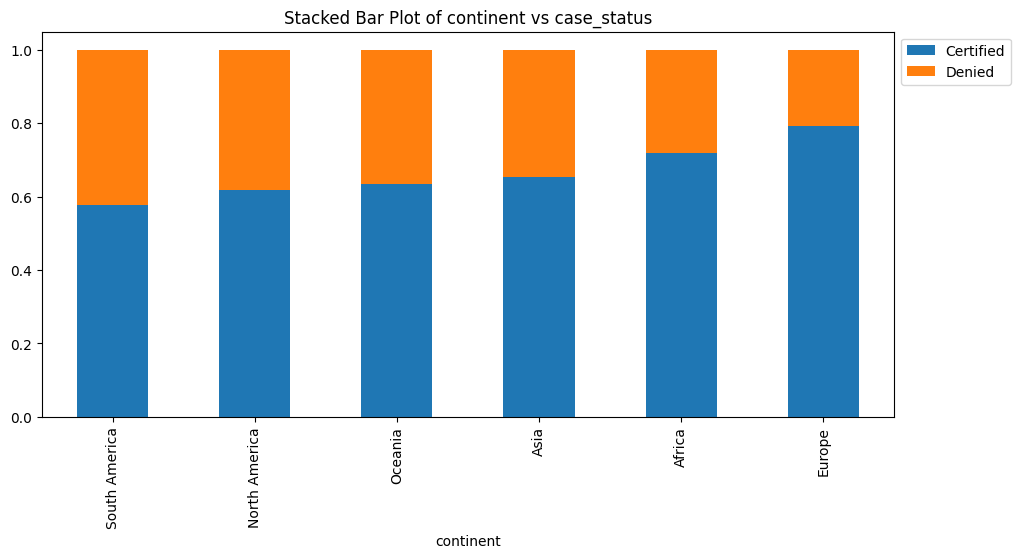

In [ ]:
stacked_barplot(df, "continent", "case_status")

#### Wage vs Case status

####Hourly Wage

In [ ]:
df_h=df[(df["unit_of_wage"] == "Hour")]

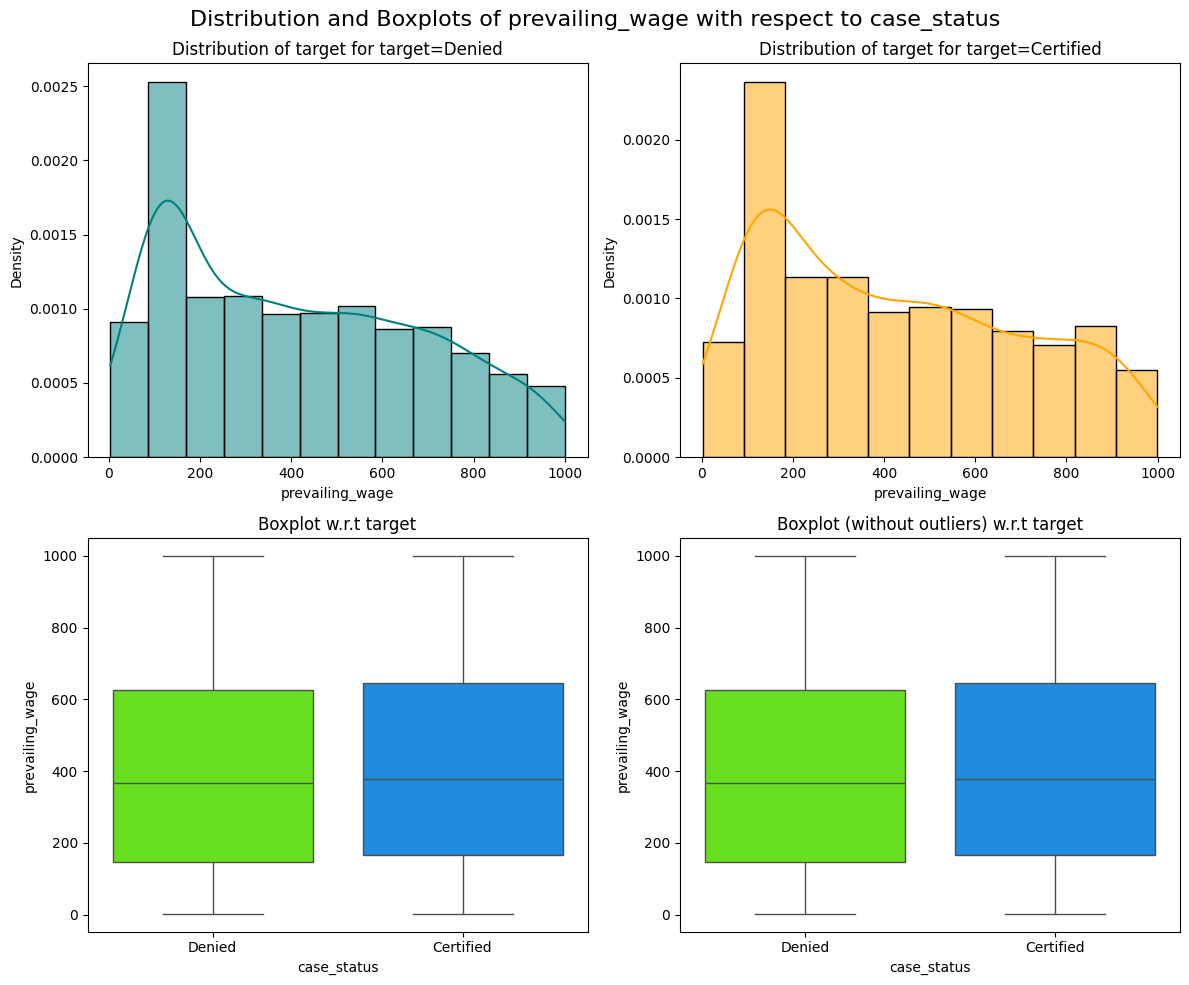

In [ ]:
distribution_plot_wrt_target(df_h, "prevailing_wage","case_status")

####Weekly Wage

In [ ]:
df_w=df[(df["unit_of_wage"] == "Week")]

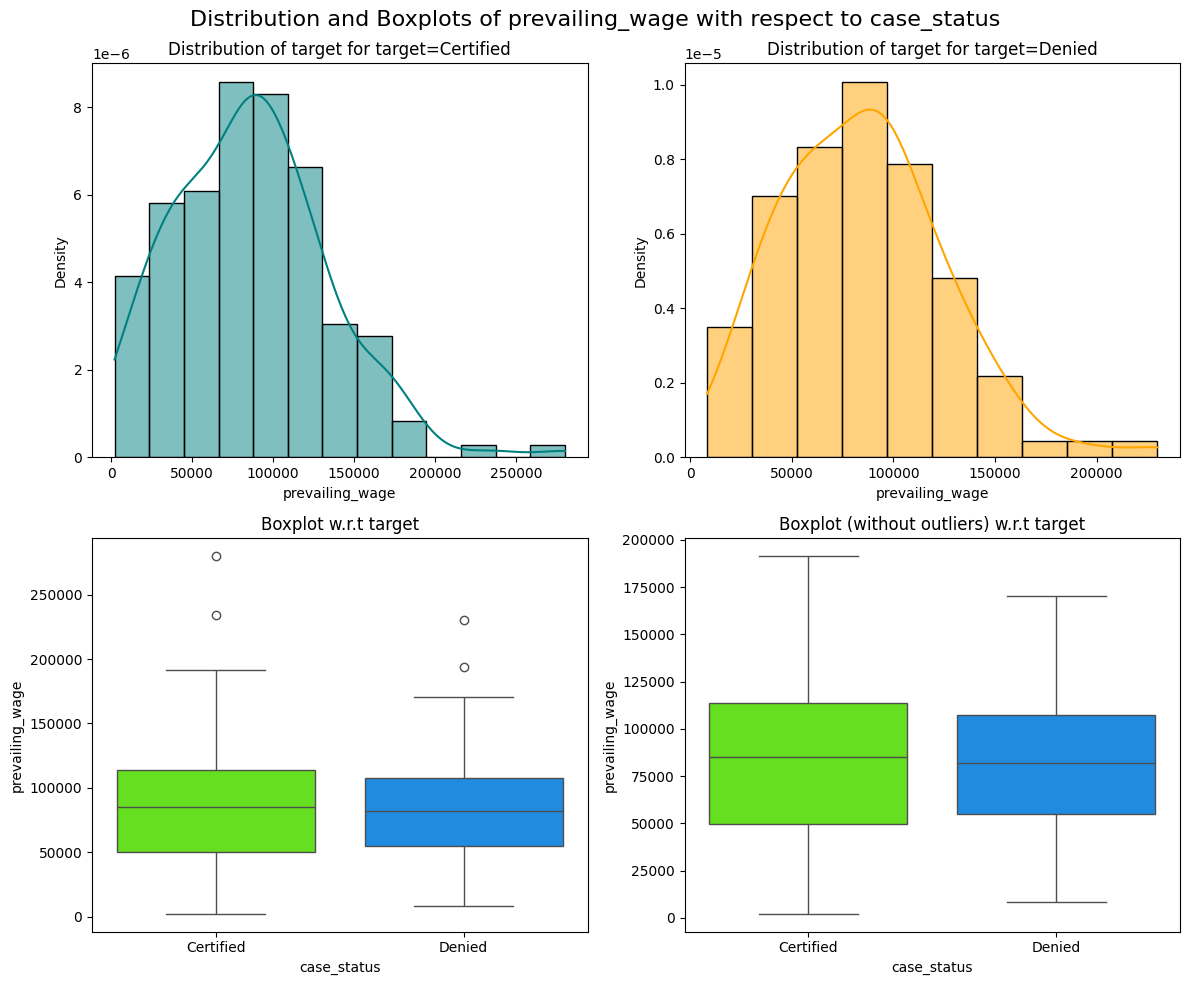

In [ ]:
distribution_plot_wrt_target(df_w, "prevailing_wage","case_status")

####Monthly Wage

In [ ]:
df_m=df[(df["unit_of_wage"] == "Month")]

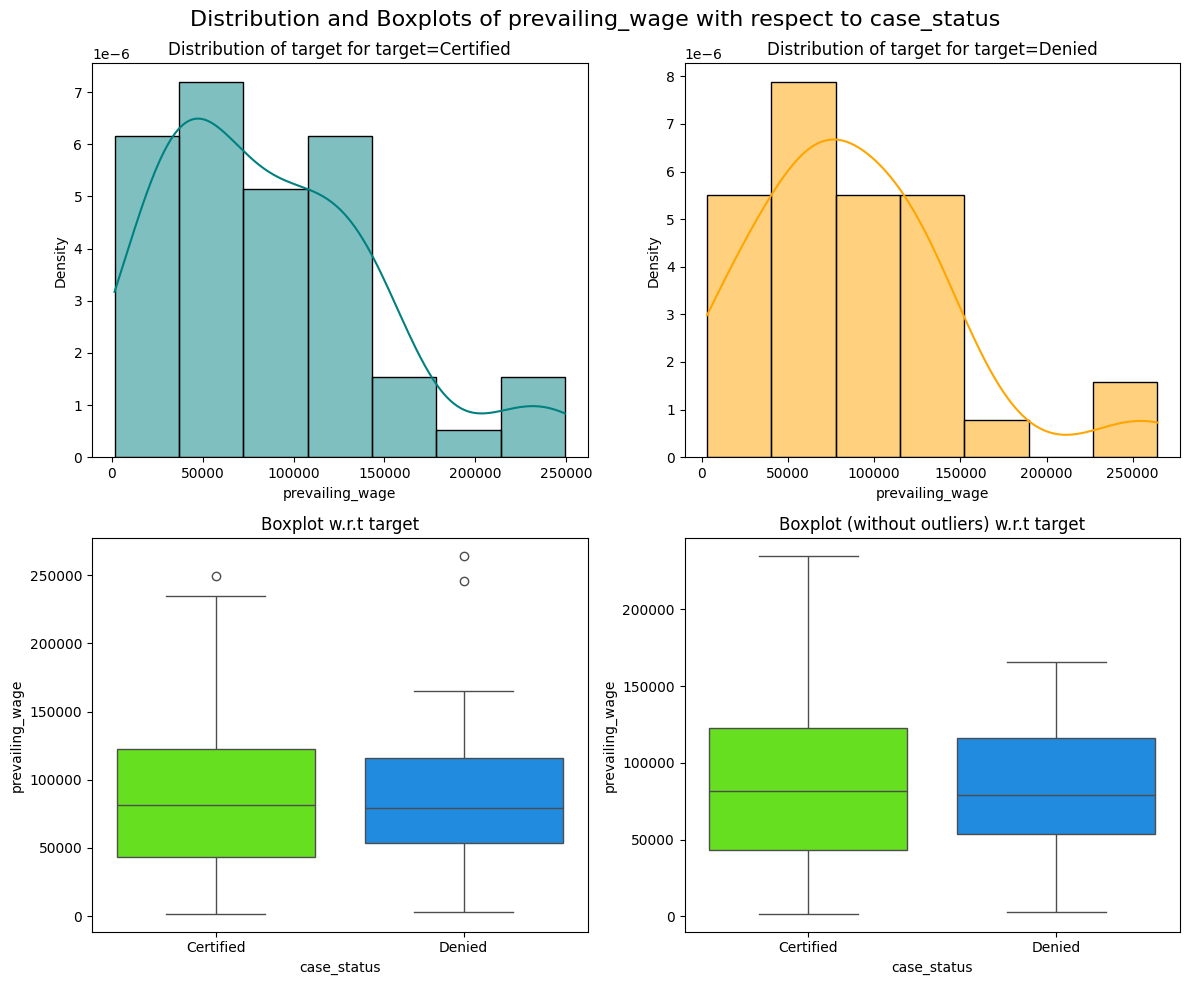

In [ ]:
distribution_plot_wrt_target(df_m, "prevailing_wage","case_status")

####Yearly Wage

In [ ]:
df_y=df[(df["unit_of_wage"] == "Year")]

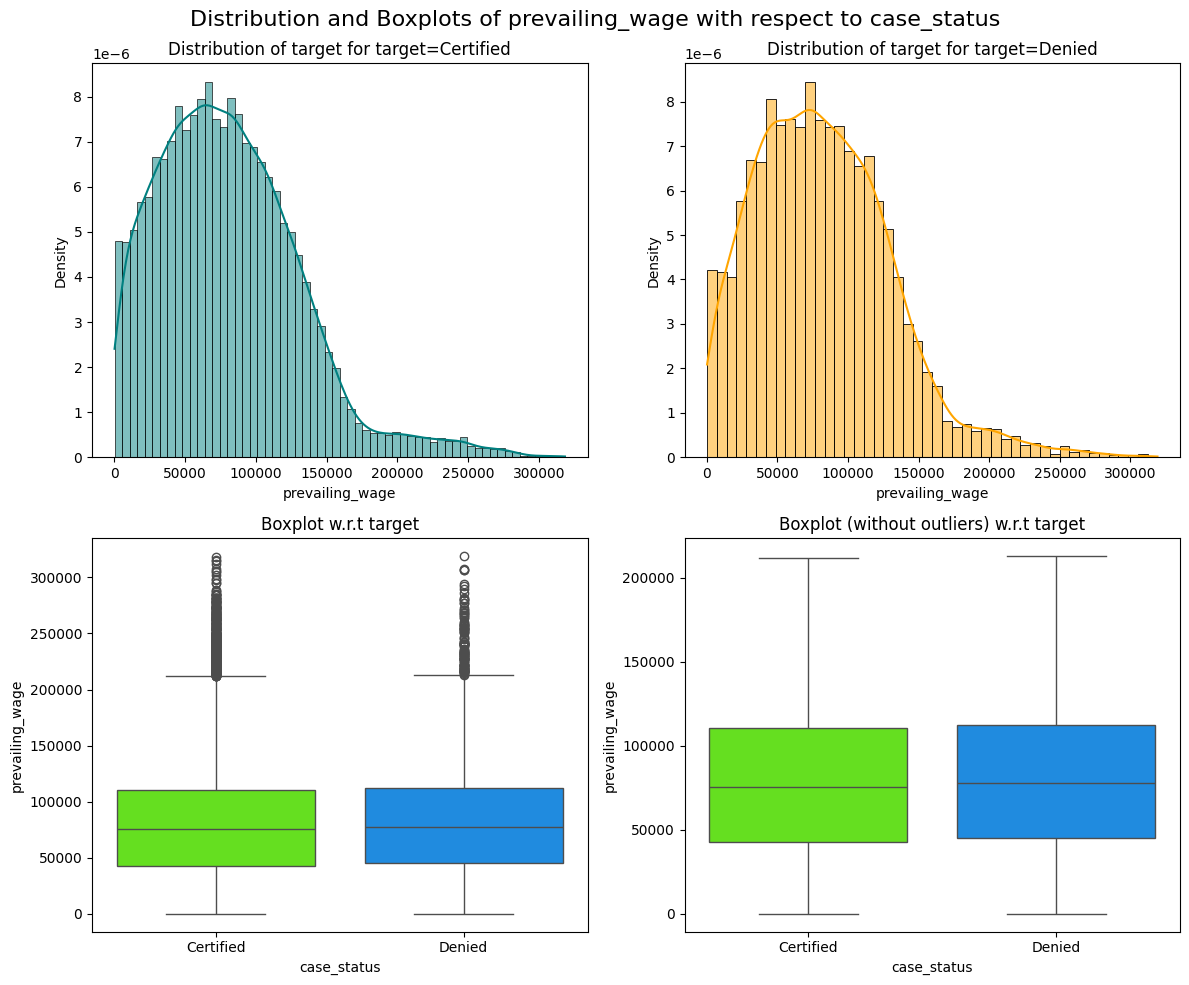

In [ ]:
distribution_plot_wrt_target(df_y, "prevailing_wage","case_status")

In [ ]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

###Insights

1. Wage Differences: There is minimal variation in wages between individuals with job experience and those without.
2. Impact of Job Training: Weekly wages exhibit a slight variation for individuals requiring job training.
3. Full-Time Employment: Individuals in full-time positions earn marginally more compared to those in non-full-time roles.
4. Certification Rates: The likelihood of visa case certification is higher for individuals with job experience.
5. Job Training and Full-Time Positions: The requirement for job training and full-time employment status do not significantly influence the likelihood of visa case certification or denial.
6. Regional Variations: Visa case denials are less common in the Midwest and island regions; however, these areas report fewer cases overall.
7. Educational Impact: Higher educational attainment correlates with increased chances of visa case certification. Specifically, doctorate holders experience fewer denials, whereas high school graduates face higher denial rates.
8. European Trends: Europe exhibits lower rejection rates for visa cases.
Wage Influence: Wage levels have a limited effect on visa case status.


# **Data Preprocessing**

### Missing values treatment

In [ ]:
df.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


### Outlier Check

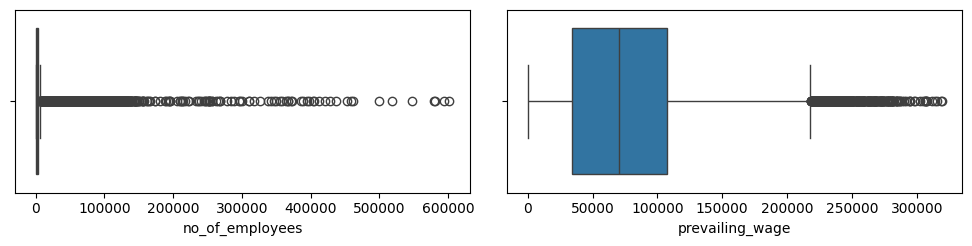

In [ ]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(1)
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
num_cols

['no_of_employees', 'prevailing_wage']

In [ ]:
Q1 = df['no_of_employees'].quantile(0.25)
Q3 = df['no_of_employees'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
IQR


2482.0

In [ ]:
lower_bound

-2701.0

In [ ]:
upper_bound

7227.0

In [ ]:
outliers = df[(df['no_of_employees'] < lower_bound) | (df['no_of_employees'] > upper_bound)]


In [ ]:
outliers

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
12,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.050,Year,Y,Certified
14,Asia,Master's,Y,Y,15756,2006,South,220081.730,Year,Y,Certified
16,Europe,Master's,Y,N,76638,1991,Midwest,3706.790,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25441,Asia,Master's,N,N,28199,1988,Northeast,97906.760,Year,Y,Certified
25443,Africa,Bachelor's,N,N,72892,2007,Northeast,215.100,Hour,Y,Certified
25455,South America,Bachelor's,N,N,24335,1993,Midwest,97393.490,Year,Y,Certified
25464,Asia,Master's,N,N,48785,1974,South,145102.360,Year,N,Certified


The number of employees and individual wages are influenced by the scale of the company. Without domain knowledge, it is challenging to accurately identify and remove outliers related to these factors.

### Feature Engineering

####Convert Wages to a Common Unit

In [89]:
conversion_factors = {
    'Hour': 2080,
    'Week': 52,
    'Month': 12,
    'Year': 1
}

In [90]:
# Convert wages to a common yearly unit
df['wage_in_yearly'] = df.apply(lambda x: x['prevailing_wage'] * conversion_factors[x['unit_of_wage']], axis=1)


In [92]:
df['wage_in_yearly'].describe()

,wage_in_yearly
count,25480.000
mean,197391.155
std,578591.666
min,100.000
25%,47107.965
50%,82839.460
75%,124825.035
max,14569149.400


Categorize wages into 4 bins based on the quartiles

In [93]:
bins = [0, 47107.965, 82839.460, 124825.035, df['wage_in_yearly'].max()]
labels = ['Low', 'Below Average', 'Above Average', 'High']


df['wage_bin'] = pd.cut(df['wage_in_yearly'], bins=bins, labels=labels, include_lowest=True)


df['wage_bin'].value_counts()

,count
wage_bin,
Low,6370
Below Average,6370
Above Average,6370
High,6370


In [ ]:
df.columns

If there is significant skewness in the data, logarithmic binning can be effective for creating ranges that accommodate large variations in wage.

In [94]:
log_bins = np.logspace(np.log10(df['wage_in_yearly'].min()), np.log10(df['wage_in_yearly'].max()), num=5)
log_labels = ['Very Low', 'Low', 'Medium', 'High']

df['wage_bin_log'] = pd.cut(df['wage_in_yearly'], bins=log_bins, labels=log_labels, include_lowest=True)

# Check the distribution of the log-based bins
df['wage_bin_log'].value_counts()

,count
wage_bin_log,
Medium,19231
Low,4625
High,1421
Very Low,203



Removing features from the dataset that have constant values and those that do not positively impact the prediction model.

In [96]:
data=df[['continent', 'education_of_employee', 'has_job_experience',
        'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'wage_bin_log',
        'case_status']]

In [133]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'wage_in_yearly', 'wage_bin',
       'wage_bin_log'],
      dtype='object')

### Data Preparation for modeling - Encoding, Train-test split, Scaling

####Categorical variables into binary numeric variables

In [97]:
data["has_job_experience"].replace("N", 0, inplace=True)
data["has_job_experience"].replace("Y", 1, inplace=True)
data["case_status"].replace("Denied", 0, inplace=True)
data["case_status"].replace("Certified", 1, inplace=True)

In [98]:
data = pd.get_dummies(data,drop_first=True)

In [134]:
data

,has_job_experience,no_of_employees,yr_of_estab,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,wage_bin_log_Low,wage_bin_log_Medium,wage_bin_log_High
0,0,14513,2007,0,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
1,1,2412,2002,1,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False
2,0,44444,2008,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,0,98,1897,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,1,1082,2005,1,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,2601,2008,1,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
25476,1,3274,2006,1,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False
25477,1,1121,1910,1,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False
25478,1,1918,1887,1,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False


In [99]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]



X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)


(15288, 18) (5096, 18) (5096, 18)


In [100]:
X

,has_job_experience,no_of_employees,yr_of_estab,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,wage_bin_log_Low,wage_bin_log_Medium,wage_bin_log_High
0,0,14513,2007,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True
1,1,2412,2002,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False
2,0,44444,2008,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,0,98,1897,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,1,1082,2005,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,2601,2008,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
25476,1,3274,2006,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False
25477,1,1121,1910,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False
25478,1,1918,1887,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False


In [101]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Model Building

### Model evaluation criterion


The model can make incorrect predictions in the following ways:

Predicting that a visa application will be certified when it is actually denied.
Predicting that a visa application will be denied when it is actually certified.
In this context, the more critical scenario is:

Predicting that a visa application will be denied when it is actually certified. This situation represents a missed opportunity to approve a valid visa application, potentially impacting valuable applicants.
To mitigate this risk, it is essential to reduce False Negatives:

We should aim to maximize Recall. By increasing Recall, the model will better identify applications that should be certified (true positives), thus minimizing the number of valid applications incorrectly classified as denied (false negatives). This approach helps in accurately approving deserving visa applications based on factors like continent, education level, job experience, number of employees, establishment year, region of employment, prevailing wage, and unit of wage.


In [102]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [103]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [104]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9812928501469148
Random forest: 1.0
GBM: 0.8746327130264446
Adaboost: 0.8883447600391773
dtree: 1.0

Validation Performance:

Bagging: 0.7655699177438308
Random forest: 0.7999412455934195
GBM: 0.8660399529964747
Adaboost: 0.882491186839013
dtree: 0.7388366627497063


In [105]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9813, Validation Score: 0.7656, Difference: 0.2157
Random forest: Training Score: 1.0000, Validation Score: 0.7999, Difference: 0.2001
GBM: Training Score: 0.8746, Validation Score: 0.8660, Difference: 0.0086
Adaboost: Training Score: 0.8883, Validation Score: 0.8825, Difference: 0.0059
dtree: Training Score: 1.0000, Validation Score: 0.7388, Difference: 0.2612


GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building - Oversampled Data

In [106]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 18)
After Oversampling, the shape of train_y: (20420,) 



In [107]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9764936336924583
Random forest: 0.9999020568070519
GBM: 0.8016650342801175
Adaboost: 0.8085210577864839
dtree: 1.0

Validation Performance:

Bagging: 0.7400117508813161
Random forest: 0.77262044653349
GBM: 0.7881903642773208
Adaboost: 0.8025851938895417
dtree: 0.7262044653349001


In [108]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9765, Validation Score: 0.7400, Difference: 0.2365
Random forest: Training Score: 0.9999, Validation Score: 0.7726, Difference: 0.2273
GBM: Training Score: 0.8017, Validation Score: 0.7882, Difference: 0.0135
Adaboost: Training Score: 0.8085, Validation Score: 0.8026, Difference: 0.0059
dtree: Training Score: 1.0000, Validation Score: 0.7262, Difference: 0.2738


GBM and AdaBoost remain the best-performing models

### Model Building - Undersampled Data

In [109]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [110]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 18)
After Under Sampling, the shape of train_y: (10156,) 



In [111]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9661283970066955
Random forest: 1.0
GBM: 0.7406459235919653
Adaboost: 0.68905080740449
dtree: 1.0

Validation Performance:

Bagging: 0.6022326674500588
Random forest: 0.6454171562867215
GBM: 0.7244418331374853
Adaboost: 0.6927144535840188
dtree: 0.6192714453584018


In [112]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9661, Validation Score: 0.6022, Difference: 0.3639
Random forest: Training Score: 1.0000, Validation Score: 0.6454, Difference: 0.3546
GBM: Training Score: 0.7406, Validation Score: 0.7244, Difference: 0.0162
Adaboost: Training Score: 0.6891, Validation Score: 0.6927, Difference: -0.0037
dtree: Training Score: 1.0000, Validation Score: 0.6193, Difference: 0.3807


AdaBoost and GBM remain the best models with small differences between training and validation scores, indicating good generalization. AdaBoost has the smallest performance gap, but GBM has slightly better overall recall, making it the better model in this case.

It was observed that the GBM and AdaBoost models trained on the undersampled and oversampled dataset, demonstrated strong performance on both the training and validation sets. Since models can sometimes overfit after undersampling or oversampling, it’s important to tune them for more generalized performance. We will proceed with tuning these three models using the same datasets (undersampled or oversampled) on which they were originally trained.

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [113]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9312726426438074:
CPU times: user 1.37 s, sys: 274 ms, total: 1.64 s
Wall time: 48.8 s


In [114]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [115]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.692,0.708,0.686,0.697


In [116]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.700,0.707,0.819,0.759


### Tuning  Gradient Boosting model with Undersampled Data

In [117]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7329673015011055:
CPU times: user 5.13 s, sys: 549 ms, total: 5.68 s
Wall time: 3min 48s


In [118]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [119]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.696,0.724,0.685,0.704


In [120]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.708,0.722,0.819,0.767


### Tuning AdaBoostClassifier model with Oversampled data

In [121]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 20, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.8198824681684622:
CPU times: user 1.87 s, sys: 235 ms, total: 2.11 s
Wall time: 1min 18s


In [122]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [123]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(tuned_adb2, X_train_over, y_train_over)
adb_train2

,Accuracy,Recall,Precision,F1
0,0.755,0.731,0.768,0.749


In [124]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb_val2

,Accuracy,Recall,Precision,F1
0,0.704,0.727,0.810,0.766


### Tuning Gradient Boosting model with Oversampled data

In [125]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8167482859941234:
CPU times: user 5.44 s, sys: 589 ms, total: 6.02 s
Wall time: 4min 53s


In [126]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [127]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.797,0.825,0.782,0.803


In [128]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.725,0.807,0.787,0.797


## Model Comparison and Final Model Selection

In [129]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train1.T,
        adb_train2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Oversampled data"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.696,0.797,0.692,0.755
Recall,0.724,0.825,0.708,0.731
Precision,0.685,0.782,0.686,0.768
F1,0.704,0.803,0.697,0.749


In [130]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val1.T, adb_val2.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
     "AdaBoost trained with Oversampled data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data,AdaBoost trained with Oversampled data
Accuracy,0.708,0.725,0.700,0.704
Recall,0.722,0.807,0.707,0.727
Precision,0.819,0.787,0.819,0.810
F1,0.767,0.797,0.759,0.766


Gradient Boosting trained with Oversampled data is the best overall model, excelling in accuracy, recall, and F1 score, making it the most balanced and effective for this scenario.

In [131]:
# Let's check the performance on test set
gdb_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gdb_test

,Accuracy,Recall,Precision,F1
0,0.707,0.807,0.767,0.786


While the recall is solid (indicating good sensitivity to actual positives), the low precision suggests that the model struggles with false positives. The overall accuracy and F1 score are reasonable but not exceptional. To improve the model's performance on the test set, focusing on boosting precision (e.g., through tuning thresholds or further refinement of oversampling techniques) might help achieve a better balance.

### Feature Importance

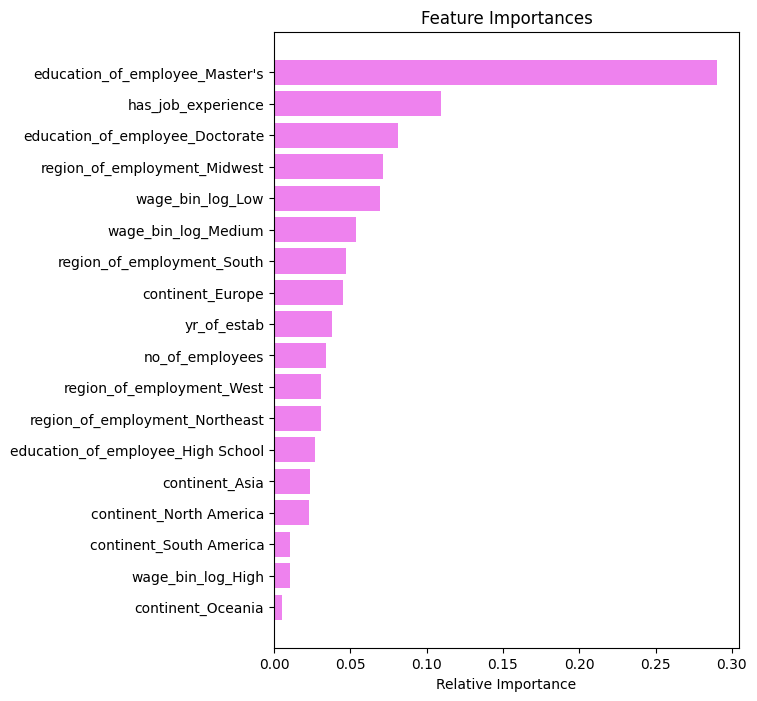

In [132]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Recommendations

1. Education of Employee - Master's:

   The most important factor driving visa certification decisions.
  * Insight: Applicants with a Master's degree are significantly more likely to have their visa applications approved.
  * Recommendation: Employers should prioritize candidates with Master's degrees for visa applications to increase their chances of approval.
2. Has Job Experience:

  Job experience is the second most important factor.
  * Insight: Candidates with job experience have a high likelihood of visa certification.
  * Recommendation: Employers should focus on hiring candidates with relevant job experience, as this greatly improves the chances of success in visa applications.

3. Education of Employee - Doctorate:

   Doctorate degrees also play a crucial role in visa certification.
  * Insight: Applicants with a PhD are very likely to receive visa approval.
  * Recommendation: When possible, prioritize PhD holders for applications as their educational background strengthens their case for visa certification.

4. Region of Employment - Midwest:
   The Midwest region significantly impacts visa certification success.
  * Insight: Visa applicants for positions in the Midwest are more likely to have their applications approved.
  * Recommendation: Companies based in the Midwest or planning to hire in this region may benefit from a higher visa approval rate.

5. Wage Bins (Low and Medium):

   Wage categories, especially low and medium wage brackets, are important for visa outcomes.
  * Insight: Offering wages in these categories may influence the likelihood of approval.
  * Recommendation: Ensure that wages offered to visa applicants are competitive and within the accepted industry norms, as this plays a role in decision-making.

6. Region of Employment - South:

   The South is another important region influencing visa outcomes.
  * Insight: Visa applications in the South show notable success rates.
  * Recommendation: Tailor visa applications to regional nuances, highlighting the strategic importance of the location for the company.
  
### Other Factors:

1. Continents (Europe, Asia, North America):

   Employment locations across these continents have a moderate impact on visa certification outcomes.
  * Insight: Regional factors tied to the applicant's continent also influence the visa decision.
  * Recommendation: Employers operating in these continents should factor in regional considerations when applying for visas.

2. Company's Year of Establishment and Number of Employees:

   Established companies and larger organizations show a slight edge in visa certifications.
  * Insight: Company stability and size may positively influence visa decisions.
  * Recommendation: Younger companies may need to provide stronger business justifications to improve their chances.

### Recommendations for EasyVisa:

1. Focus on Education:
   Develop targeted strategies to prioritize applicants with advanced educational qualifications, particularly Master's and Doctorate degrees.

2. Enhance Job Experience Criteria:
   Emphasize job experience as a key differentiator in visa applications, working with employers to highlight candidates’ relevant work history.

3. Regional and Wage-Based Strategy:
   Tailor visa applications based on employment region, especially the Midwest and South, and ensure wages align with industry standards.